In [157]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import itertools
import traindatanyc as tdn

In [158]:
df = pd.read_csv('data-by-modzcta.csv', sep=',')
columns_to_drop = ['COVID_DEATH_COUNT', 'COVID_DEATH_RATE','NEIGHBORHOOD_NAME', 'MODIFIED_ZCTA', 'PERCENT_POSITIVE']
df.drop(columns= columns_to_drop,inplace=True)

Mh_total_CCC = df.loc[df['BOROUGH_GROUP'] == 'Manhattan', 'COVID_CASE_COUNT'].sum()
Si_total_CCC = df.loc[df['BOROUGH_GROUP'] == 'Staten Island', 'COVID_CASE_COUNT'].sum()
Bk_total_CCC = df.loc[df['BOROUGH_GROUP'] == 'Brooklyn', 'COVID_CASE_COUNT'].sum()
Q_total_CCC = df.loc[df['BOROUGH_GROUP'] == 'Queens', 'COVID_CASE_COUNT'].sum()
Bx_total_CCC = df.loc[df['BOROUGH_GROUP'] == 'Bronx', 'COVID_CASE_COUNT'].sum()

Mh_total_TCT = df.loc[df['BOROUGH_GROUP'] == 'Manhattan', 'TOTAL_COVID_TESTS'].sum()
Si_total_TCT = df.loc[df['BOROUGH_GROUP'] == 'Staten Island', 'TOTAL_COVID_TESTS'].sum()
Bk_total_TCT = df.loc[df['BOROUGH_GROUP'] == 'Brooklyn', 'TOTAL_COVID_TESTS'].sum()
Q_total_TCT = df.loc[df['BOROUGH_GROUP'] == 'Queens', 'TOTAL_COVID_TESTS'].sum()
Bx_total_TCT = df.loc[df['BOROUGH_GROUP'] == 'Bronx', 'TOTAL_COVID_TESTS'].sum()

Mh_total_CCR = df.loc[df['BOROUGH_GROUP'] == 'Manhattan', 'COVID_CASE_RATE'].sum()
Si_total_CCR = df.loc[df['BOROUGH_GROUP'] == 'Staten Island', 'COVID_CASE_RATE'].sum()
Bk_total_CCR = df.loc[df['BOROUGH_GROUP'] == 'Brooklyn', 'COVID_CASE_RATE'].sum()
Q_total_CCR = df.loc[df['BOROUGH_GROUP'] == 'Queens', 'COVID_CASE_RATE'].sum()
Bx_total_CCR = df.loc[df['BOROUGH_GROUP'] == 'Bronx', 'COVID_CASE_RATE'].sum()

Mh_total_PD = df.loc[df['BOROUGH_GROUP'] == 'Manhattan', 'POP_DENOMINATOR'].sum()
Si_total_PD = df.loc[df['BOROUGH_GROUP'] == 'Staten Island', 'POP_DENOMINATOR'].sum()
Bk_total_PD = df.loc[df['BOROUGH_GROUP'] == 'Brooklyn', 'POP_DENOMINATOR'].sum()
Q_total_PD = df.loc[df['BOROUGH_GROUP'] == 'Queens', 'POP_DENOMINATOR'].sum()
Bx_total_PD = df.loc[df['BOROUGH_GROUP'] == 'Bronx', 'POP_DENOMINATOR'].sum()

df = df[0:0]

Mh_total_CCR = (Mh_total_CCC/Mh_total_PD)*100
Si_total_CCR = (Si_total_CCC/Si_total_PD)*100
Bk_total_CCR = (Bk_total_CCC/Bk_total_PD)*100
Q_total_CCR = (Q_total_CCC/Q_total_PD)*100
Bx_total_CCR = (Bx_total_CCC/Bx_total_PD)*100

df2 = {'BOROUGH_GROUP': 'Manhattan',  'COVID_CASE_COUNT': Mh_total_CCC,  'COVID_CASE_RATE': Mh_total_CCR, 'POP_DENOMINATOR': Mh_total_PD, 'TOTAL_COVID_TESTS': Mh_total_TCT} 
df = df.append(df2, ignore_index = True)
df3 = {'BOROUGH_GROUP': 'Staten Island',  'COVID_CASE_COUNT': Si_total_CCC,  'COVID_CASE_RATE': Si_total_CCR, 'POP_DENOMINATOR': Si_total_PD, 'TOTAL_COVID_TESTS': Si_total_TCT} 
df = df.append(df3, ignore_index = True)
df4 = {'BOROUGH_GROUP': 'Brooklyn',  'COVID_CASE_COUNT': Bk_total_CCC,  'COVID_CASE_RATE': Bk_total_CCR, 'POP_DENOMINATOR': Bk_total_PD, 'TOTAL_COVID_TESTS': Bk_total_TCT} 
df = df.append(df4, ignore_index = True)
df5 = {'BOROUGH_GROUP': 'Queens',  'COVID_CASE_COUNT': Q_total_CCC,  'COVID_CASE_RATE': Q_total_CCR, 'POP_DENOMINATOR': Q_total_PD, 'TOTAL_COVID_TESTS': Q_total_TCT} 
df = df.append(df5, ignore_index = True)
df6 = {'BOROUGH_GROUP': 'Bronx',  'COVID_CASE_COUNT': Bx_total_CCC,  'COVID_CASE_RATE': Bx_total_CCR, 'POP_DENOMINATOR': Bx_total_PD, 'TOTAL_COVID_TESTS': Bx_total_TCT} 
df = df.append(df6, ignore_index = True)

df.insert(1, "Population_Density (km^2)", [27757, 3160, 14158, 8001, 13022], True)
df.insert(1, "Hospitilization Count", [11949, 4532, 24027, 25083, 18196], True)

df.insert(2, "Population", [1628706, 476143, 2559903, 2253858, 1418207])

# df['Hos_by_pop'] = (df['Hospitilization Count'] / df['Population']).astype(float) * 100
# df['Covid_case_by_pop'] = (df['COVID_CASE_COUNT'] / df['Population']).astype(float)

# df['Hos_by_pop'] = (df['Hospitilization Count'] / df['Population_Density (km^2)']).astype(float)
# df['Covid_case_by_pop'] = (df['COVID_CASE_COUNT'] / df['Population']).astype(float)

#df.insert(1, "Hospitalization by Population density", [])

df.head()

,BOROUGH_GROUP,Hospitilization Count,Population,Population_Density (km^2),COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,TOTAL_COVID_TESTS
0,Manhattan,11949,1628706,27757,73341,4.551327,1611420.18,962572
1,Staten Island,4532,476143,3160,44113,9.264654,476143.00,272692
2,Brooklyn,24027,2559903,14158,156216,6.102419,2559903.02,1311023
3,Queens,25083,2253858,8001,157280,6.933735,2268330.27,1163920
4,Bronx,18196,1418207,13022,107727,7.580960,1421020.59,749857


In [ ]:
ori_dict = tdn.NYCturnstileDictionary()

corrected_dict['Queens'] = ori_dict.pop('Q')
corrected_dict['Manhattan'] = ori_dict.pop('M')
corrected_dict['Brooklyn'] = ori_dict.pop('Bk')
corrected_dict['Bronx'] = ori_dict.pop('Bx')
corrected_dict['Staten Island'] = ori_dict.pop('SI')


corrected_dict

In [208]:
"""
index= []
data = []
for i, (key, val) in enumerate(corrected_dict.items()):
    index.append(key)
    data.append(list(map(float, val)))

fig, (ax, ax2) = plt.subplots(ncols=2)
ax.boxplot(data)
ax.set_xticklabels(index)
ax2.violinplot(data)
ax2.set_xticks(range(1,len(index)+1))
ax2.set_xticklabels(index) 

plt.show()*/
"""

'\nindex= []\ndata = []\nfor i, (key, val) in enumerate(corrected_dict.items()):\n    index.append(key)\n    data.append(list(map(float, val)))\n\nfig, (ax, ax2) = plt.subplots(ncols=2)\nax.boxplot(data)\nax.set_xticklabels(index)\nax2.violinplot(data)\nax2.set_xticks(range(1,len(index)+1))\nax2.set_xticklabels(index) \n\nplt.show()*/\n'

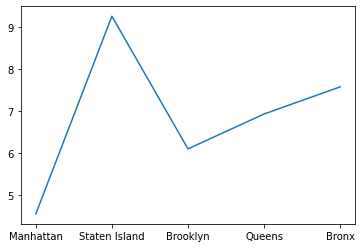

In [26]:
x = df["BOROUGH_GROUP"]
y = df["COVID_CASE_RATE"]

plt.plot(x,y)

In [ ]:
df.plot.scatter(x = "BOROUGH_GROUP", y = "Hos_by_pop")

In [ ]:
df = pd.read_csv('data-by-modzcta.csv', sep=',')
#columns_to_drop = ['DEATH_COUNT', 'DEATH_RATE']
#df.drop(columns= columns_to_drop,inplace=True)
df.head()